In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
from keras.utils import np_utils
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
tf.debugging.set_log_device_placement(True)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[]


In [3]:
DIRECTORY = R'C:\Users\Sebaiexx\Desktop\data'
CATEGORIES = ['cloudy', 'desert', 'green_area', 'water']

In [4]:
IMG_SIZE = 200
data = [] 

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])

In [5]:
print(len(data))
random.shuffle(data)

5631


In [6]:
#msk = np.random.rand(len(data)) < 0.9
train_data = data[0:int(len(data)*0.9)]
test_data = data[int(len(data)*0.9):]
X = []
Y = []
x = []
y = []
for features, label in train_data:
    X.append(features)
    Y.append(label)
for features, label in test_data:
    x.append(features)
    y.append(label)
X = np.array(X)
Y = np.array(Y)
x = np.array(x)
y = np.array(y)

In [7]:
print(X.shape)
print(x.shape)
print(Y.shape)
print(y.shape)

(5067, 200, 200, 3)
(564, 200, 200, 3)
(5067,)
(564,)


In [8]:
Y = to_categorical(Y, num_classes=4)
y = to_categorical(y, num_classes=4)
print(Y.shape)
print(y.shape)

(5067, 4)
(564, 4)


In [9]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=X[0].shape)
fine_tune = 0
if fine_tune > 0:
    for layer in base_model.layers[:-fine_tune]:
        layer.trainable = False
else:
    for layer in base_model.layers:
        layer.trainable = False

## Preprocessing input
X = preprocess_input(X) 
x = preprocess_input(x)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in

Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

In [10]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(4, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:C

In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(X, Y, epochs=5, validation_split=0.2, batch_size=32, callbacks=[es])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
  4/127 [..............................] - ETA: 7:17 - loss: 1.0065 - accuracy: 0.6016Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
  5/127 [>.............................] - ETA: 7:12 - loss: 0.8811 - accuracy: 0.6625Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
  6/127 [>.............................] - ETA: 7:03 - loss: 0.7580 - accuracy: 0.7135Executing op ReadVariableOp in device /job:lo

 27/127 [=====>........................] - ETA: 5:26 - loss: 0.2787 - accuracy: 0.9005Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 28/127 [=====>........................] - ETA: 5:23 - loss: 0.2703 - accuracy: 0.9029Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 29/127 [=====>........................] - ETA: 5:20 - loss: 0.2778 - accuracy: 0.9041Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:lo

Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 51/127 [===========>..................] - ETA: 4:04 - loss: 0.2212 - accuracy: 0.9222Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 52/127 [===========>..................] - ETA: 4:01 - loss: 0.2178 - accuracy: 0.9237Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 53/127 [===========>..................] - ETA: 3:57 - loss: 0.2165 - accuracy: 0.9239Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:lo

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 75/127 [================>.............] - ETA: 2:46 - loss: 0.1754 - accuracy: 0.9400Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 76/127 [================>.............] - ETA: 2:43 - loss: 0.1737 - accuracy: 0.9404Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 77/127 [=================>............] - ETA: 2:39 - loss: 0.1830 - accuracy: 0.9403Executing op ReadVariableOp in device /job:lo

 98/127 [======================>.......] - ETA: 1:31 - loss: 0.1629 - accuracy: 0.9483Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 99/127 [======================>.......] - ETA: 1:27 - loss: 0.1615 - accuracy: 0.9489Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
100/127 [======================>.......] - ETA: 1:24 - loss: 0.1603 - accuracy: 0.9491Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:lo

122/127 [===========================>..] - ETA: 15s - loss: 0.1404 - accuracy: 0.9557Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
123/127 [============================>.] - ETA: 12s - loss: 0.1394 - accuracy: 0.9560Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
124/127 [============================>.] - ETA: 9s - loss: 0.1383 - accuracy: 0.9564 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:local

Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:loc

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 2/5
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
  1/127 [..............................] - ETA: 5:22 - loss: 0.0014 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/de

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 23/127 [====>.........................] - ETA: 4:31 - loss: 0.0123 - accuracy: 0.9946Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 24/127 [====>.........................] - ETA: 4:29 - loss: 0.0122 - accuracy: 0.9948Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 25/127 [====>.........................] - ETA: 4:26 - loss: 0.0130 - accuracy: 0.9937Executing op ReadVariableOp in device /job:lo

 46/127 [=========>....................] - ETA: 3:32 - loss: 0.0112 - accuracy: 0.9952Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 47/127 [==========>...................] - ETA: 3:29 - loss: 0.0110 - accuracy: 0.9953Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 48/127 [==========>...................] - ETA: 3:27 - loss: 0.0107 - accuracy: 0.9954Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:lo

Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 70/127 [===============>..............] - ETA: 2:29 - loss: 0.0098 - accuracy: 0.9964Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 71/127 [===============>..............] - ETA: 2:27 - loss: 0.0100 - accuracy: 0.9965Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 72/127 [================>.............] - ETA: 2:24 - loss: 0.0099 - accuracy: 0.9965Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:lo

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 94/127 [=====================>........] - ETA: 1:27 - loss: 0.0090 - accuracy: 0.9970Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 95/127 [=====================>........] - ETA: 1:24 - loss: 0.0089 - accuracy: 0.9970Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 96/127 [=====================>........] - ETA: 1:22 - loss: 0.0089 - accuracy: 0.9971Executing op ReadVariableOp in device /job:lo

117/127 [==========================>...] - ETA: 26s - loss: 0.0107 - accuracy: 0.9968Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
118/127 [==========================>...] - ETA: 23s - loss: 0.0106 - accuracy: 0.9968Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
119/127 [===========================>..] - ETA: 21s - loss: 0.0106 - accuracy: 0.9968Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:local

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:loca

  4/127 [..............................] - ETA: 5:16 - loss: 0.1841 - accuracy: 0.9844Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
  5/127 [>.............................] - ETA: 5:15 - loss: 0.1475 - accuracy: 0.9875Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
  6/127 [>.............................] - ETA: 5:14 - loss: 0.1237 - accuracy: 0.9896Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:lo

Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 28/127 [=====>........................] - ETA: 4:17 - loss: 0.0332 - accuracy: 0.9955Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 29/127 [=====>........................] - ETA: 4:15 - loss: 0.0321 - accuracy: 0.9957Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 30/127 [======>.......................] - ETA: 4:12 - loss: 0.0310 - accuracy: 0.9958Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:lo

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 52/127 [===========>..................] - ETA: 3:22 - loss: 0.0192 - accuracy: 0.9976Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 53/127 [===========>..................] - ETA: 3:21 - loss: 0.0189 - accuracy: 0.9976Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 54/127 [===========>..................] - ETA: 3:20 - loss: 0.0186 - accuracy: 0.9977Executing op ReadVariableOp in device /job:lo

 75/127 [================>.............] - ETA: 2:27 - loss: 0.0137 - accuracy: 0.9983Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 76/127 [================>.............] - ETA: 2:24 - loss: 0.0135 - accuracy: 0.9984Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 77/127 [=================>............] - ETA: 2:21 - loss: 0.0134 - accuracy: 0.9984Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:lo

Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 99/127 [======================>.......] - ETA: 1:21 - loss: 0.0113 - accuracy: 0.9984Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
100/127 [======================>.......] - ETA: 1:18 - loss: 0.0112 - accuracy: 0.9984Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
101/127 [======================>.......] - ETA: 1:15 - loss: 0.0111 - accuracy: 0.9985Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:lo

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
123/127 [============================>.] - ETA: 11s - loss: 0.0104 - accuracy: 0.9985Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
124/127 [============================>.] - ETA: 8s - loss: 0.0104 - accuracy: 0.9985 Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
125/127 [============================>.] - ETA: 5s - loss: 0.0104 - accuracy: 0.9985Executing op ReadVariableOp in device /job:localh

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:loca

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:loc

Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 19/127 [===>..........................] - ETA: 4:52 - loss: 0.0039 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 20/127 [===>..........................] - ETA: 4:50 - loss: 0.0038 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 21/127 [===>..........................] - ETA: 4:47 - loss: 0.0036 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:lo

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 43/127 [=========>....................] - ETA: 3:48 - loss: 0.0029 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 44/127 [=========>....................] - ETA: 3:46 - loss: 0.0030 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 45/127 [=========>....................] - ETA: 3:43 - loss: 0.0029 - accuracy: 1.0000Executing op ReadVariableOp in device /job:lo

 66/127 [==============>...............] - ETA: 2:48 - loss: 0.0023 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 67/127 [==============>...............] - ETA: 2:46 - loss: 0.0023 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 68/127 [===============>..............] - ETA: 2:43 - loss: 0.0023 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:lo

Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 90/127 [====================>.........] - ETA: 1:43 - loss: 0.0020 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 91/127 [====================>.........] - ETA: 1:40 - loss: 0.0020 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 92/127 [====================>.........] - ETA: 1:37 - loss: 0.0020 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:lo

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
114/127 [=========================>....] - ETA: 36s - loss: 0.0017 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
115/127 [==========================>...] - ETA: 33s - loss: 0.0017 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
116/127 [==========================>...] - ETA: 30s - loss: 0.0017 - accuracy: 1.0000Executing op ReadVariableOp in device /job:local

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:loca

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /j

Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 10/127 [=>............................] - ETA: 5:25 - loss: 8.7353e-04 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 11/127 [=>............................] - ETA: 5:25 - loss: 8.7184e-04 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 12/127 [=>............................] - ETA: 5:23 - loss: 8.7945e-04 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in de

 33/127 [======>.......................] - ETA: 4:25 - loss: 6.7245e-04 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 34/127 [=======>......................] - ETA: 4:22 - loss: 6.9738e-04 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 35/127 [=======>......................] - ETA: 4:20 - loss: 6.8774e-04 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in de

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 57/127 [============>.................] - ETA: 3:18 - loss: 5.8019e-04 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 58/127 [============>.................] - ETA: 3:15 - loss: 5.7126e-04 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 59/127 [============>.................] - ETA: 3:12 - loss: 6.0524e-04 - accuracy: 1.0000Executing op ReadVariableOp in de

 80/127 [=================>............] - ETA: 2:12 - loss: 5.8269e-04 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 81/127 [==================>...........] - ETA: 2:09 - loss: 5.7744e-04 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
 82/127 [==================>...........] - ETA: 2:06 - loss: 5.8597e-04 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in de

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
104/127 [=======================>......] - ETA: 1:04 - loss: 5.7203e-04 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
105/127 [=======================>......] - ETA: 1:01 - loss: 5.6816e-04 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_1895 in device /job:localhost/replica:0/task:0/device:CPU:0
106/127 [========================>.....] - ETA: 58s - loss: 5.6407e-04 - accuracy: 1.0000 Executing op ReadVariableOp in de

127/127 [==============================] - ETA: 0s - loss: 5.3218e-04 - accuracy: 1.0000Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp

Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2695 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:loca

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 50)                921650    
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 4)                 84        
                                                                 
Total params: 15,637,442
Trainable params: 922,754
Non-trainable params: 14,714,688
_________________________________________________________________


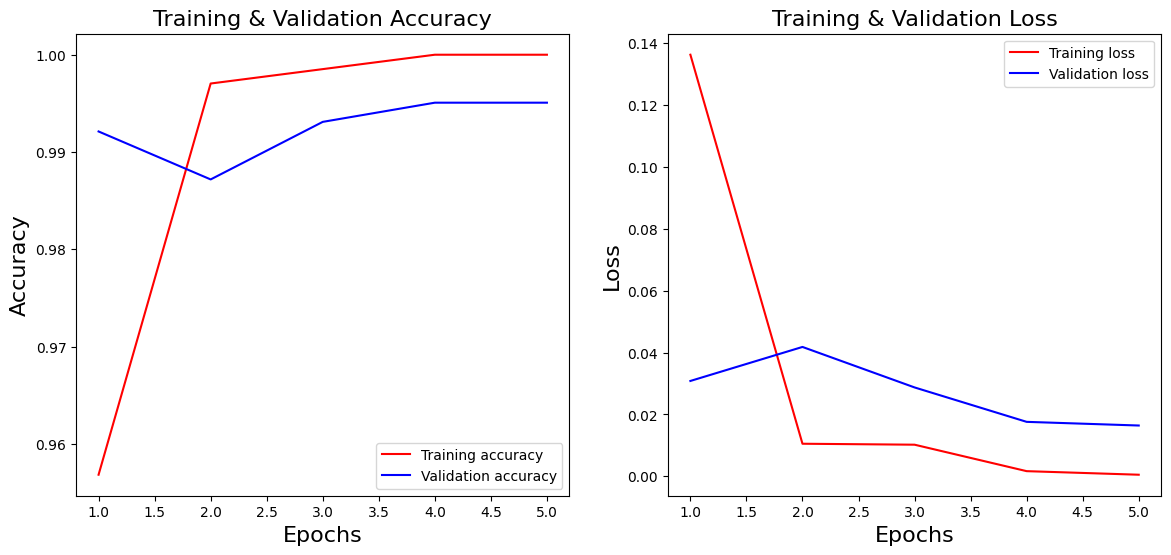

In [12]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()
model.summary()

In [13]:
# make dictionary of class labels and names
classes = range(0,4)
names = ['cloudy',
        'desert',
        'green_area',
        'water']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = x[100:109]
labels = np.argmax(y[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op 

In [14]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[2 0 2 3 1 2 2 3 3]


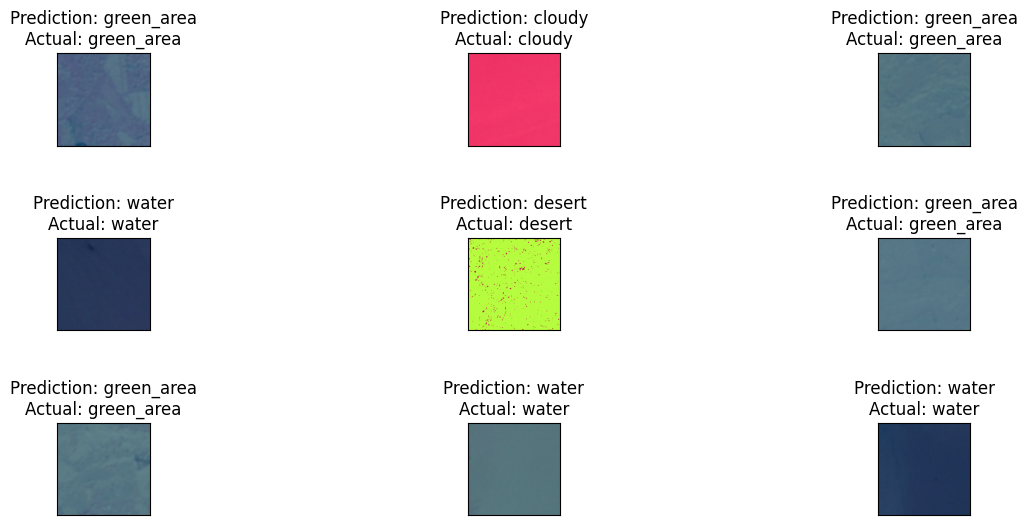

In [15]:

fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
#     axs[i].imshow(img)
    axs[i].imshow((img * 255).astype(np.uint8))
    
# show the plot
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix , accuracy_score

#Predict
y_prediction = model.predict(x)
y_prediction = np.argmax (y_prediction, axis = 1)
y = np.argmax(y, axis=1)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y , y_prediction)
print(accuracy_score(y , y_prediction))  
print(result)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op 

Executing op Shape in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replic

In [ ]:
from sklearn.model_selection import KFold

nFolds = 3
kfold = KFold(n_splits=nFolds, shuffle=True)

fold = 0
model, acc, history = ([None] * nFolds for i in range(3))
for train, test in kfold.split(X, Y):
  model[fold] = model()
  model[fold].compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])

  print('------------------------------------------------------------------------')
  print(f'Training for fold #{fold + 1} ...')

  history[fold] = model[fold].fit(X, Y,
                                  validation_data = (x, y), epochs = 5)
  
  scores = model[fold].evaluate(x, y, verbose=0)
  acc[fold] = scores[1]
  fold += 1